# Proyecto Módulo 2

## Precio Umbral

## Portafolio de inversiones

### Nombres
- Juan Pablo Domínguez
- Daniel Pastrana
- Rodolfo Magdaleno

### 20/04/2023

#### Objetivo General:

#### Objetivos específicos:

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Describimos una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*.

In [3]:
def getClose(names, start, end) :
    return yf.download(names, start = start, end = end)["Adj Close"]

#### Para que el portafolio tuviera acciones diversas, escogimos acciones de empresas diferentes entre sí. Decidimos usar las acciones de CEMEX, Bimbo y Walmart

In [4]:
data_cemex = getClose("CEMEXCPO.MX", "2022-01-01", "2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [5]:
data_bimbo = getClose("BIMBOA.MX", "2022-01-01", "2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [6]:
data_walmart = getClose("WALMEX.MX", "2022-01-01", "2022-12-31")

[*********************100%***********************]  1 of 1 completed


#### Graficamos los precios de cierre ajustados de cada empresa en un histograma

<AxesSubplot:ylabel='Frequency'>

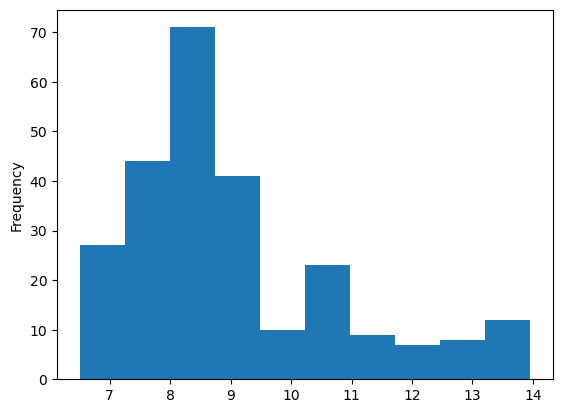

In [7]:
data_cemex.plot.hist()

<AxesSubplot:ylabel='Frequency'>

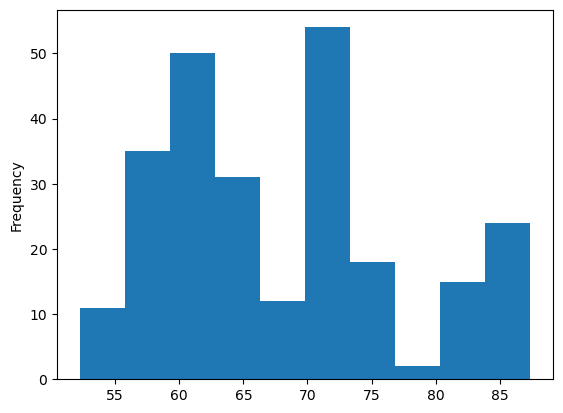

In [8]:
data_bimbo.plot.hist()

<AxesSubplot:ylabel='Frequency'>

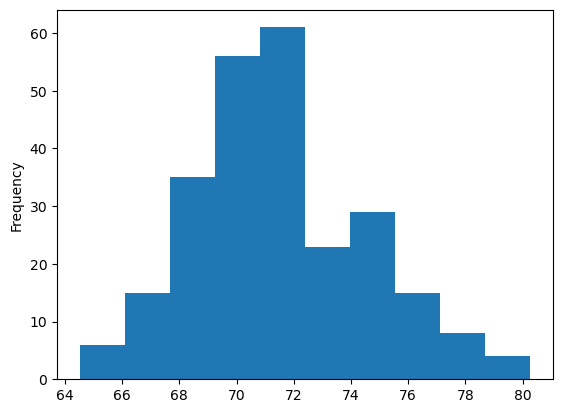

In [9]:
data_walmart.plot.hist()

#### Calculamos el rendimiento simple y logarítmico de cada empresa, y al suponer que son variables aleatorias con una distribución normal, decidimos representarlos con un histograma

<AxesSubplot:ylabel='Frequency'>

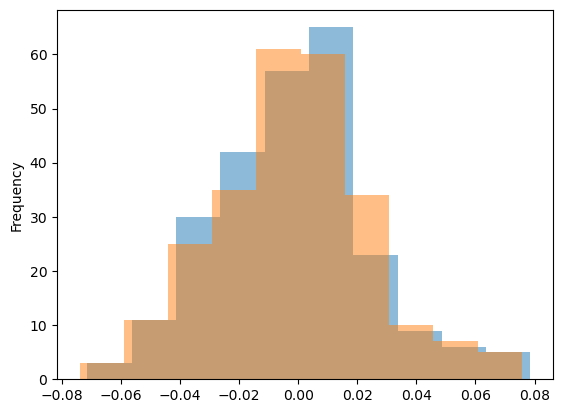

In [10]:
R_cemex = (data_cemex - data_cemex.shift())/data_cemex.shift()
r_cemex = np.log(data_cemex/data_cemex.shift())
R_cemex.plot.hist(alpha = 0.5)
r_cemex.plot.hist(alpha = 0.5)

<AxesSubplot:ylabel='Frequency'>

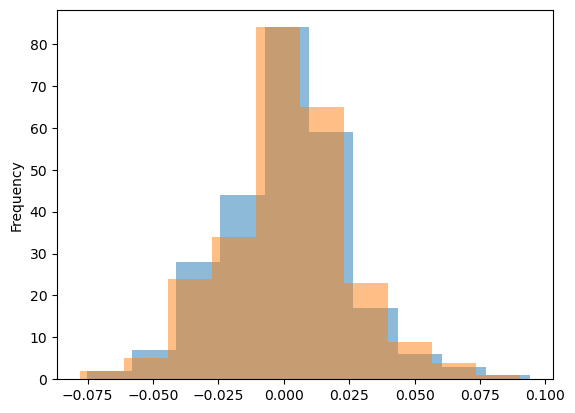

In [11]:
R_bimbo = (data_bimbo - data_bimbo.shift())/data_bimbo.shift()
r_bimbo = np.log(data_bimbo/data_bimbo.shift())
R_bimbo.plot.hist(alpha = 0.5)
r_bimbo.plot.hist(alpha = 0.5)

<AxesSubplot:ylabel='Frequency'>

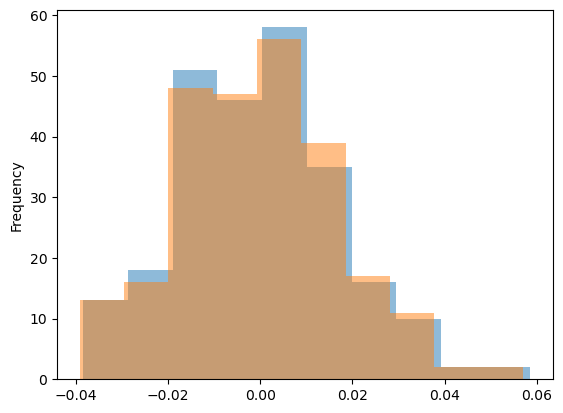

In [12]:
R_walmart = (data_walmart - data_walmart.shift())/data_walmart.shift()
r_walmart = np.log(data_walmart/data_walmart.shift())
R_walmart.plot.hist(alpha = 0.5)
r_walmart.plot.hist(alpha = 0.5)

#### Obtenemos la media y la desviación estándar de los rendimientos simples de cada empresa, para después guardar cada una en una variable diferente

In [13]:
R_cemex.describe()

count    251.000000
mean      -0.001863
std        0.026182
min       -0.071319
25%       -0.018211
50%       -0.001370
75%        0.013601
max        0.078616
Name: Adj Close, dtype: float64

In [14]:
R_bimbo.describe()

count    251.000000
mean       0.001452
std        0.023687
min       -0.075123
25%       -0.011177
50%        0.001656
75%        0.016074
max        0.094323
Name: Adj Close, dtype: float64

In [15]:
R_walmart.describe()

count    251.000000
mean      -0.000097
std        0.017305
min       -0.038426
25%       -0.011812
50%        0.000000
75%        0.010294
max        0.058627
Name: Adj Close, dtype: float64

In [16]:
R_cemex_mean = R_cemex.mean()
R_cemex_std = R_cemex.std()

R_bimbo_mean = R_bimbo.mean()
R_bimbo_std = R_bimbo.std()

R_walmart_mean = R_walmart.mean()
R_walmart_std = R_walmart.std()

#### Escribimos una función que regrese en un DataFrame de pandas para cada empresa, dando como argumentos la media, la desviación estandar, la fecha de inicio, la fecha del fin de simulación y el número de escenarios a simular, que en este caso decidimos que fueran 10000

In [17]:
def sim_r_cemex(media, std, inicio, end, N) :
    m = 365
    r_cemex = np.random.normal(media, std, size = (m, N))
    fechas_cemex = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_cemex, data = r_cemex)

In [18]:
def sim_r_bimbo(media, std, inicio, end, N) :
    m = 365
    r_bimbo = np.random.normal(media, std, size = (m, N))
    fechas_bimbo = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_bimbo, data = r_bimbo)

In [19]:
def sim_r_walmart(media, std, inicio, end, N) :
    m = 365
    r_walmart = np.random.normal(media, std, size = (m, N))
    fechas_walmart = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_walmart, data = r_walmart)

In [20]:
r_simulados_cemex = sim_r_cemex(R_cemex_mean, R_cemex_std, "2023-01-01", "2023-12-31", 10000)
r_simulados_bimbo = sim_r_bimbo(R_bimbo_mean, R_bimbo_std, "2023-01-01", "2023-12-31", 10000)
r_simulados_walmart = sim_r_walmart(R_walmart_mean, R_walmart_std, "2023-01-01", "2023-12-31", 10000)

#### Simulamos los 10000 escenarios de rendimientos de cada empresa del 01 de enero de 2023 al 31 de diciembre de 2023

In [35]:
rendimientos_simulados_cemex = (r_simulados_cemex + 1).cumprod()
rendimientos_simulados_cemex

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,1.001357,0.934625,1.001166,0.950762,1.043351,0.968698,0.956398,1.018960,1.041486,1.022885,...,1.019971,1.052211,1.019573,1.026774,1.015702,1.020012,1.040821,1.022497,1.011150,0.967003
2023-01-02,1.055488,0.884527,1.016557,0.981326,1.047760,0.951257,0.974570,1.017284,1.019156,1.006900,...,1.010465,1.046428,1.064089,1.056176,0.988839,1.060649,1.018357,1.005636,1.017862,0.987887
2023-01-03,1.035347,0.888241,0.988481,0.998899,1.021562,0.944491,0.993638,1.039154,0.963172,1.000829,...,1.018596,1.052873,1.048832,1.071722,0.954696,1.057779,1.063525,0.957450,1.014615,0.964497
2023-01-04,0.993979,0.915046,0.968027,0.984568,0.998760,0.972208,0.984698,1.028365,0.943016,1.023534,...,1.001148,1.082820,1.000012,1.102625,0.979367,1.080124,1.075063,0.975649,1.035866,0.969689
2023-01-05,1.025265,0.909359,0.925811,0.994420,1.009498,0.936405,0.951773,0.975350,0.966071,1.064146,...,1.029280,1.061239,1.004378,1.056974,0.951651,1.068834,1.098952,0.967220,1.055107,0.962343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.621311,0.505752,0.415308,0.309253,0.510641,0.494478,0.357355,0.581292,0.167076,0.624988,...,0.432268,0.410581,0.866052,0.588126,1.173979,0.263838,0.365421,0.443229,2.114529,0.273126
2023-12-28,0.610550,0.510232,0.409469,0.316043,0.517617,0.478250,0.363139,0.561351,0.167647,0.600451,...,0.449259,0.404376,0.833307,0.606047,1.199042,0.263595,0.353620,0.445906,2.159073,0.254098
2023-12-29,0.599205,0.517087,0.395984,0.316849,0.512438,0.477873,0.350836,0.563725,0.167712,0.625888,...,0.456574,0.400947,0.807421,0.604335,1.214106,0.259618,0.346941,0.420035,2.228099,0.248001
2023-12-30,0.596882,0.534020,0.413348,0.314095,0.526872,0.448306,0.347551,0.554954,0.169062,0.614629,...,0.459179,0.389798,0.799479,0.605358,1.224180,0.258926,0.349861,0.432401,2.188507,0.247942


In [27]:
rendimientos_simulados_bimbo = (r_simulados_bimbo + 1).cumprod()
rendimientos_simulados_bimbo

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,0.995309,0.969843,0.981684,0.981273,1.030972,0.999629,0.994759,1.020582,0.992737,1.015087,...,1.017598,1.055206,1.044751,1.005417,0.977164,0.990653,0.998120,1.037305,0.999924,0.977743
2023-01-02,0.999175,0.976256,0.939020,1.012579,1.045590,0.957902,0.947431,1.009180,1.000276,0.992165,...,1.034949,1.076180,1.059672,1.005476,0.995123,1.013586,0.974760,1.010193,0.969238,0.992248
2023-01-03,0.991435,0.992379,0.901741,1.007318,1.023907,1.005211,0.963351,1.009378,1.039020,1.045836,...,1.038872,1.092836,1.050065,1.035120,0.977705,1.017973,0.997504,0.987048,1.002356,1.005541
2023-01-04,0.975960,0.973804,0.904188,1.056530,1.002662,1.011961,0.953714,1.011723,1.047522,1.055027,...,1.087476,1.108097,1.058059,1.037750,1.004214,1.028822,1.011049,0.997261,1.013901,1.003800
2023-01-05,0.970316,1.004365,0.907806,1.058545,0.983987,1.023272,0.947469,0.989657,1.066656,1.050033,...,1.089267,1.093190,1.036544,1.031770,0.986932,1.036283,1.066847,1.022801,1.033275,0.969534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,3.468280,1.055472,1.200981,2.405248,1.923415,1.887662,1.237472,1.545182,2.408490,0.989023,...,1.719869,1.443482,2.128664,0.839128,1.428491,1.110490,4.000038,2.098890,1.108090,2.011294
2023-12-28,3.613620,1.028053,1.193201,2.411667,1.889268,1.878734,1.249077,1.606553,2.277323,0.962502,...,1.732063,1.490026,2.098283,0.857459,1.437236,1.118873,4.173303,2.063766,1.120357,2.073914
2023-12-29,3.505396,1.062653,1.192981,2.433216,1.846375,1.871305,1.204992,1.520457,2.266623,0.989929,...,1.694541,1.472487,2.148505,0.863547,1.422674,1.080718,4.137428,1.976479,1.104857,2.103498
2023-12-30,3.649723,1.051919,1.169600,2.464196,1.868584,1.898025,1.222170,1.570350,2.306418,0.991512,...,1.667442,1.514852,2.083075,0.872077,1.430616,1.087327,4.070404,2.008038,1.069101,2.051412


In [28]:
rendimientos_simulados_walmart = (r_simulados_walmart + 1).cumprod()
rendimientos_simulados_walmart

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,1.021344,1.010987,1.025304,0.996023,1.012185,1.006804,1.004608,0.998354,1.008048,1.014522,...,1.035659,0.984473,0.992827,1.012166,1.007910,1.008719,0.977632,1.026129,1.010702,1.010956
2023-01-02,1.009678,1.017778,1.037871,1.008047,1.003913,0.974804,0.976706,1.025449,1.004835,1.060828,...,1.032918,0.983743,1.015798,0.999669,0.998296,1.022689,0.982584,1.037897,1.030256,1.021340
2023-01-03,0.982497,1.017002,1.042150,1.052458,0.990758,0.983413,0.948917,1.020560,1.004217,1.085966,...,1.037097,0.988684,0.996199,1.027413,0.979800,1.035447,0.979130,1.040160,1.019866,1.002258
2023-01-04,0.999228,1.024839,1.044713,1.054567,0.998534,1.002214,0.958604,1.009333,1.036948,1.080555,...,1.018784,0.953466,0.992097,1.017247,0.966543,1.055721,0.956655,1.044256,0.994254,1.026849
2023-01-05,1.006851,1.014676,1.045252,1.062489,1.030144,0.995544,0.947441,1.017579,1.038359,1.081748,...,1.045230,0.940227,0.999918,1.019618,0.976409,1.039481,0.970153,1.027462,0.988231,1.028419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,1.014378,0.533986,0.725083,0.807160,0.624749,1.217768,0.526558,1.070750,1.716621,1.110696,...,0.981881,1.189745,0.749657,0.352292,0.593220,1.482342,0.639816,0.777760,1.082920,0.742581
2023-12-28,0.984960,0.549513,0.733009,0.788760,0.618967,1.255055,0.525774,1.042824,1.704659,1.091676,...,1.017877,1.201448,0.748909,0.359620,0.605166,1.481692,0.645206,0.780972,1.062398,0.734233
2023-12-29,1.007030,0.548295,0.709198,0.792359,0.623288,1.283488,0.530763,1.057539,1.721973,1.092433,...,1.040748,1.222870,0.735473,0.357901,0.602846,1.518350,0.654389,0.793892,1.058777,0.727334
2023-12-30,1.027877,0.567112,0.697541,0.796054,0.632604,1.275665,0.512554,1.048129,1.688987,1.115018,...,1.010509,1.232836,0.741723,0.350682,0.599676,1.504723,0.666213,0.776445,1.036449,0.712449


#### Con los rendimientos simulados encontramos los precios al cierre proyectados para cada empresa en todo el año simulado

In [36]:
precios_simulados_cemex = rendimientos_simulados_cemex * data_cemex[-1]
precios_simulados_cemex

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,7.930751,7.402229,7.929235,7.530033,8.263337,7.672091,7.574674,8.070159,8.248571,8.101249,...,8.078167,8.333513,8.075020,8.132048,8.044357,8.078497,8.243304,8.098176,8.008308,7.658667
2023-01-02,8.359467,7.005457,8.051130,7.772101,8.298263,7.533955,7.718593,8.056889,8.071715,7.974648,...,8.002886,8.287709,8.427584,8.364917,7.831606,8.400341,8.065391,7.964637,8.061467,7.824065
2023-01-03,8.199947,7.034865,7.828769,7.911283,8.090774,7.480371,7.869611,8.230101,7.628320,7.926569,...,8.067281,8.338755,8.306749,8.488038,7.561194,8.377608,8.423115,7.583001,8.035747,7.638814
2023-01-04,7.872315,7.247168,7.666772,7.797780,7.910178,7.699887,7.798805,8.144650,7.468683,8.106389,...,7.929090,8.575937,7.920097,8.732794,7.756588,8.554581,8.514502,7.727142,8.204059,7.679940
2023-01-05,8.120097,7.202122,7.332419,7.875808,7.995223,7.416324,7.538041,7.724772,7.651283,8.428036,...,8.151900,8.405012,7.954676,8.371233,7.537078,8.465162,8.703697,7.660381,8.356444,7.621755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4.920786,4.005554,3.289238,2.449286,4.044273,3.916264,2.830253,4.603834,1.323246,4.949907,...,3.423559,3.251805,6.859130,4.657960,9.297911,2.089593,2.894138,3.510373,16.747073,2.163162
2023-12-28,4.835555,4.041041,3.242996,2.503061,4.099529,3.787739,2.876058,4.445903,1.327766,4.755575,...,3.558132,3.202660,6.599791,4.799894,9.496410,2.087675,2.800668,3.531572,17.099856,2.012453
2023-12-29,4.745707,4.095326,3.136195,2.509441,4.058506,3.784757,2.778624,4.464702,1.328278,4.957030,...,3.616068,3.175500,6.394778,4.786337,9.615722,2.056171,2.747773,3.326673,17.646547,1.964170
2023-12-30,4.727305,4.229435,3.273716,2.487632,4.172829,3.550581,2.752602,4.395233,1.338974,4.867865,...,3.636698,3.087200,6.331877,4.794435,9.695507,2.050696,2.770896,3.424617,17.332978,1.963697


In [30]:
precios_simulados_bimbo = rendimientos_simulados_bimbo * data_bimbo[-1]
precios_simulados_bimbo

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,81.913934,79.818100,80.792565,80.758809,84.848986,82.269442,81.868687,83.993895,81.702278,83.541693,...,83.748352,86.843484,85.983040,82.745837,80.420636,81.530745,82.145299,85.370189,82.293729,80.468259
2023-01-02,82.232118,80.345866,77.281333,83.335262,86.052032,78.835305,77.973543,83.055538,82.322692,81.655166,...,85.176298,88.569588,87.211014,82.750656,81.898603,83.418114,80.222773,83.138905,79.768288,81.662046
2023-01-03,81.595079,81.672824,74.213276,82.902273,84.267515,82.728846,79.283809,83.071852,85.511387,86.072305,...,85.499143,89.940368,86.420339,85.190376,80.465105,83.779156,82.094613,81.234021,82.493923,82.756039
2023-01-04,80.321527,80.144090,74.414697,86.952419,82.519106,83.284411,78.490640,83.264817,86.211095,86.828758,...,89.499276,91.196354,87.078261,85.406827,82.646827,84.672039,83.209331,82.074599,83.444071,82.612769
2023-01-05,79.857027,82.659235,74.712478,87.118219,80.982097,84.215277,77.976691,81.448764,87.785785,86.417748,...,89.646673,89.969528,85.307556,84.914683,81.224546,85.286079,87.801487,84.176556,85.038567,79.792667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,285.439487,86.865311,98.840708,197.951955,158.297019,155.354548,101.843937,127.168459,198.218769,81.396587,...,141.545200,118.798605,175.189062,69.060212,117.564801,91.393369,329.203127,172.738646,91.195796,165.529469
2023-12-28,297.400961,84.608772,98.200460,198.480237,155.486732,154.619785,102.799069,132.219307,187.423683,79.213936,...,142.548831,122.629180,172.688683,70.568886,118.284487,92.083271,343.462826,169.847988,92.205349,170.683107
2023-12-29,288.494096,87.456362,98.182355,200.253714,151.956708,154.008414,99.170849,125.133590,186.543115,81.471195,...,139.460748,121.185704,176.821993,71.069933,117.086090,88.943086,340.510319,162.664247,90.929749,173.117921
2023-12-30,300.372183,86.572947,96.258102,202.803377,153.784509,156.207438,100.584587,129.239777,189.818244,81.601408,...,137.230489,124.672330,171.437088,71.771937,117.739673,89.487018,334.994295,165.261530,87.986982,168.831198


In [31]:
precios_simulados_walmart = rendimientos_simulados_walmart * data_walmart[-1]
precios_simulados_walmart

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,69.612947,68.907040,69.882851,67.887115,68.988664,68.621939,68.472239,68.045968,68.706748,69.147982,...,70.588669,67.099917,67.669284,68.987395,68.697304,68.752474,66.633605,69.939079,68.887603,68.904921
2023-01-02,68.817815,69.369901,70.739428,68.706676,68.424882,66.440871,66.570506,69.892775,68.487719,72.304088,...,70.401839,67.050108,69.234957,68.135641,68.042019,69.704650,66.971162,70.741145,70.220379,69.612695
2023-01-03,66.965190,69.317027,71.031051,71.733652,67.528301,67.027643,64.676433,69.559494,68.445595,74.017454,...,70.686663,67.386904,67.899152,70.026575,66.781390,70.574176,66.735707,70.895441,69.512212,68.312056
2023-01-04,68.105556,69.851203,71.205744,71.877402,68.058272,68.309065,65.336710,68.794278,70.676519,73.648667,...,69.438443,64.986506,67.619535,69.333684,65.877814,71.956017,65.203905,71.174570,67.766538,69.988160
2023-01-05,68.625155,69.158464,71.242469,72.417296,70.212771,67.854509,64.575880,69.356312,70.772683,73.729999,...,71.241006,64.084169,68.152609,69.495287,66.550254,70.849160,66.123903,70.029957,67.356016,70.095148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,69.138200,36.395523,49.420323,55.014535,42.581756,83.000877,35.889270,72.980360,117.001801,75.703044,...,66.923248,81.090830,51.095269,24.011587,40.432791,101.033761,43.608704,53.010704,73.809891,50.612969
2023-12-28,67.133083,37.453798,49.960594,53.760458,42.187695,85.542292,35.835782,71.076980,116.186475,74.406684,...,69.376648,81.888508,51.044287,24.511056,41.247026,100.989420,43.976081,53.229621,72.411117,50.043973
2023-12-29,68.637362,37.370765,48.337661,54.005740,42.482160,87.480230,36.175863,72.079975,117.366552,74.458265,...,70.935484,83.348591,50.128507,24.393884,41.088877,103.487989,44.601984,54.110215,72.164309,49.573745
2023-12-30,70.058252,38.653342,47.543121,54.257615,43.117146,86.946987,34.934774,71.438551,115.118299,75.997585,...,68.874492,84.027857,50.554512,23.901840,40.872837,102.559163,45.407860,52.921075,70.642482,48.559200


#### Con una gráfica mostramos las probabilidades de cada empresa de tener un retorno del 20% 

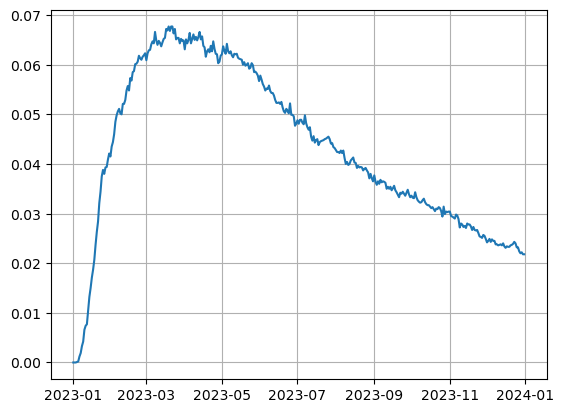

In [37]:
valor_deseado_cemex = data_cemex[-1]*1.20
probabilidad_cemex = (precios_simulados_cemex >= valor_deseado_cemex).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_cemex)
plt.grid()

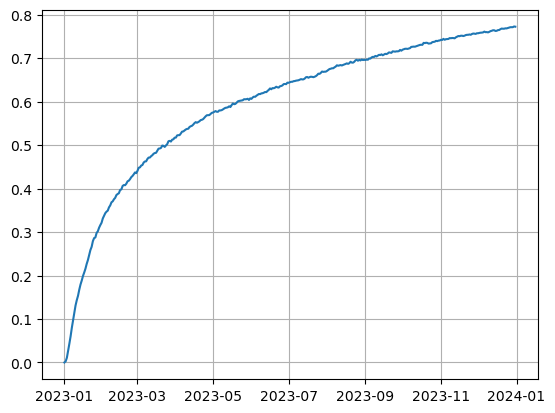

In [33]:
valor_deseado_bimbo = data_bimbo[-1]*1.10
probabilidad_bimbo = (precios_simulados_bimbo >= valor_deseado_bimbo).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_bimbo)
plt.grid()

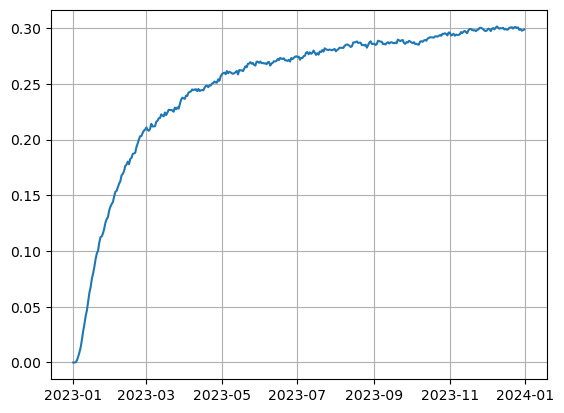

In [34]:
valor_deseado_walmart = data_walmart[-1]*1.10
probabilidad_walmart = (precios_simulados_walmart >= valor_deseado_walmart).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_walmart)
plt.grid()

#### Al comparar las gráficas podemos darnos cuenta que la acción de Bimbo es la que más probabilidad tiene de que el retorno sea del 20%

#### Ahora vamos a ver si cambian los datos que resultaron utilizando el rendimiento logarítmico

In [38]:
r_cemex.describe()

count    251.000000
mean      -0.002206
std        0.026188
min       -0.073990
25%       -0.018379
50%       -0.001371
75%        0.013510
max        0.075679
Name: Adj Close, dtype: float64

In [39]:
r_bimbo.describe()

count    251.000000
mean       0.001173
std        0.023645
min       -0.078094
25%       -0.011240
50%        0.001655
75%        0.015946
max        0.090136
Name: Adj Close, dtype: float64

In [40]:
r_walmart.describe()

count    251.000000
mean      -0.000246
std        0.017257
min       -0.039184
25%       -0.011882
50%        0.000000
75%        0.010242
max        0.056973
Name: Adj Close, dtype: float64

#### Hacemos el mismo proceso ahora con los nuevos datos surgidos del rendimiento logarítmico

In [41]:
r_cemex_mean = r_cemex.mean()
r_cemex_std = r_cemex.std()

r_bimbo_mean = r_bimbo.mean()
r_bimbo_std = r_bimbo.std()

r_walmart_mean = r_walmart.mean()
r_walmart_std = r_walmart.std()

In [42]:
def sim_r_cemex_log(media, std, inicio, end, N) :
    m = 365
    r_cemex_log = np.random.normal(media, std, size = (m, N))
    fechas_cemex_log = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_cemex_log, data = r_cemex_log)

In [43]:
def sim_r_bimbo_log(media, std, inicio, end, N) :
    m = 365
    r_bimbo_log = np.random.normal(media, std, size = (m, N))
    fechas_bimbo_log = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_bimbo_log, data = r_bimbo_log)

In [44]:
def sim_r_walmart_log(media, std, inicio, end, N) :
    m = 365
    r_walmart_log = np.random.normal(media, std, size = (m, N))
    fechas_walmart_log = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_walmart_log, data = r_walmart_log)

In [45]:
r_simulados_cemex_log = sim_r_cemex_log(r_cemex_mean, r_cemex_std, "2023-01-01", "2023-12-31", 10000)
r_simulados_bimbo_log = sim_r_bimbo_log(r_bimbo_mean, r_bimbo_std, "2023-01-01", "2023-12-31", 10000)
r_simulados_walmart_log = sim_r_walmart_log(r_walmart_mean, r_walmart_std, "2023-01-01", "2023-12-31", 10000)

In [46]:
rendimientos_simulados_cemex_log = (r_simulados_cemex_log + 1).cumprod()
rendimientos_simulados_cemex_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,1.008241,1.014539,0.997934,0.987569,0.980278,1.008568,0.984891,0.992467,1.020022,0.992373,...,0.966516,0.965944,0.985743,0.952717,1.032311,1.013736,1.006368,0.958197,0.982879,0.993196
2023-01-02,0.967291,0.990996,1.008515,0.975663,1.014969,1.075246,0.957520,0.970488,1.013441,0.976681,...,0.929820,0.936495,0.983869,0.885852,1.088677,0.978437,1.006027,0.971066,0.975084,1.011119
2023-01-03,0.963226,1.022062,0.979830,0.974714,1.057179,1.064365,0.922087,0.966969,1.023093,0.955913,...,0.951288,0.939654,0.978598,0.887914,1.063292,0.972740,1.013127,0.924333,0.977642,1.029819
2023-01-04,0.946580,1.042072,0.965728,0.977650,1.068712,1.068097,0.917866,0.970050,1.017727,0.947940,...,0.957215,0.933798,0.973285,0.838269,1.004671,0.987423,1.009627,0.969551,0.946314,1.031633
2023-01-05,0.952500,1.056241,0.939156,0.956152,1.061938,1.064277,0.897168,1.003075,0.990654,0.928236,...,0.938713,0.882097,0.933191,0.822928,1.013424,0.925470,0.965479,0.992055,0.940301,1.081158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.368042,0.421965,0.412261,0.284289,0.672092,1.024338,0.437701,0.480364,0.369938,1.005561,...,0.504032,0.540002,1.162273,0.321971,0.213550,0.282711,0.730090,0.111655,0.412852,0.693015
2023-12-28,0.365191,0.418568,0.422421,0.268676,0.666255,1.010956,0.450018,0.463718,0.375262,1.009938,...,0.488070,0.539232,1.151034,0.317557,0.219960,0.279227,0.699375,0.107867,0.419826,0.680225
2023-12-29,0.353155,0.424173,0.418976,0.286065,0.679795,1.023557,0.451394,0.465001,0.376089,1.015871,...,0.501125,0.527124,1.176148,0.319378,0.228867,0.276282,0.733864,0.105808,0.411321,0.670067
2023-12-30,0.361261,0.420702,0.427527,0.284603,0.686485,1.013555,0.448080,0.450438,0.365013,0.998050,...,0.505177,0.509566,1.118225,0.317488,0.237531,0.266740,0.727756,0.106398,0.398084,0.690359


In [47]:
rendimientos_simulados_bimbo_log = (r_simulados_bimbo_log + 1).cumprod()
rendimientos_simulados_bimbo_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,0.997744,1.012230,1.053644,0.980436,1.027823,0.995397,0.973642,0.976820,1.049628,0.994319,...,1.016852,0.977687,1.044220,0.977649,0.976828,0.991077,1.034024,1.005953,0.987360,0.983931
2023-01-02,0.992931,1.005676,1.038633,0.968356,0.997028,0.968537,1.003178,0.984239,1.025290,1.013294,...,1.054664,0.993269,1.087178,0.979458,0.965369,1.074364,1.040782,0.998548,0.949445,0.986846
2023-01-03,0.966573,1.031122,1.035287,0.955505,0.981191,0.942082,0.974542,0.977824,0.995712,1.012776,...,1.104744,1.038072,1.109511,0.950687,0.973088,1.034266,1.021052,0.950336,0.978572,0.962264
2023-01-04,0.970381,1.047067,1.034622,0.949938,0.923568,0.915196,0.943700,0.977853,1.018861,1.009992,...,1.090196,1.013012,1.150417,0.947013,0.964665,1.036499,1.058896,0.953219,0.946208,0.947702
2023-01-05,0.968729,1.060373,1.046272,0.934108,0.911874,0.941906,0.927556,0.970590,1.050547,1.031655,...,1.104295,0.986753,1.143414,0.967330,0.947461,1.028605,1.054800,0.961460,0.948446,0.965617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.664058,1.234903,0.639558,1.825922,0.850937,0.956940,2.287478,1.830048,1.921145,2.046266,...,1.150636,1.978816,2.245060,2.478718,1.085732,0.875680,1.171775,2.054929,1.303597,2.938848
2023-12-28,0.698610,1.254872,0.632839,1.848820,0.859473,0.938599,2.335626,1.909748,1.976702,2.082106,...,1.186682,1.947810,2.298320,2.430660,1.128558,0.864876,1.152063,2.092292,1.310173,2.989514
2023-12-29,0.686587,1.211104,0.621902,1.775631,0.852169,0.967094,2.303459,1.882523,2.046097,2.002639,...,1.207066,1.887488,2.383492,2.370664,1.119847,0.842229,1.168634,2.075671,1.294265,2.953807
2023-12-30,0.672316,1.227285,0.629031,1.779272,0.828846,0.947242,2.300419,1.973512,2.050965,2.126135,...,1.215844,1.973046,2.383569,2.399398,1.115820,0.895667,1.161844,2.115202,1.367460,2.909208


In [48]:
rendimientos_simulados_walmart_log = (r_simulados_walmart_log + 1).cumprod()
rendimientos_simulados_walmart_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,0.968004,1.011337,0.989200,1.011931,0.989365,1.018229,1.011907,0.982580,1.014331,1.027704,...,1.050984,1.000260,1.036409,0.986622,0.983140,0.996029,0.974492,1.017005,0.965363,1.022241
2023-01-02,0.949553,1.006010,0.978469,1.011266,0.980531,1.038575,1.009139,0.991993,1.044379,1.044312,...,1.061720,0.992998,1.031514,0.969342,1.002090,0.980650,0.986123,1.029411,0.980031,1.034174
2023-01-03,0.936731,0.996042,0.990815,1.005302,0.977378,1.018419,1.012824,0.994544,1.030589,1.040719,...,1.057842,0.968095,1.003829,0.973320,1.001580,0.962414,1.007694,0.999963,0.995536,1.060774
2023-01-04,0.923732,1.001645,0.993566,0.989784,0.987451,1.014737,1.036946,0.989998,1.039119,1.025338,...,1.066698,1.005502,1.023877,0.946368,0.999418,0.958824,1.029312,0.979245,0.975224,1.058612
2023-01-05,0.934559,1.004338,1.013303,0.999415,0.980967,1.017079,1.020249,0.991374,1.031973,1.028756,...,1.062581,1.022075,1.028841,0.924284,0.998401,0.953828,1.008089,0.978736,0.989684,1.021504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,1.008843,0.883402,0.753267,0.671145,1.133763,0.699657,0.652961,0.951720,1.446644,1.351653,...,1.507899,0.997271,0.608732,0.970715,1.166544,0.393927,0.875879,0.542341,0.533483,1.212173
2023-12-28,1.024795,0.895457,0.735025,0.669009,1.115316,0.699428,0.653647,0.932797,1.444346,1.333037,...,1.554116,0.986697,0.629937,0.978813,1.183298,0.397829,0.913608,0.544634,0.542599,1.205686
2023-12-29,1.017721,0.889628,0.743155,0.671634,1.144131,0.708716,0.654141,0.931267,1.435359,1.327839,...,1.564168,0.980770,0.622710,0.963856,1.186344,0.395434,0.914064,0.534568,0.535750,1.201154
2023-12-30,1.003306,0.924910,0.733790,0.656170,1.145691,0.703177,0.652626,0.928677,1.412100,1.320294,...,1.549401,0.984000,0.636088,0.969081,1.219558,0.396613,0.924114,0.533810,0.534301,1.223098


In [49]:
precios_simulados_cemex_log = rendimientos_simulados_cemex_log * data_cemex[-1]
precios_simulados_cemex_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,7.985268,8.035147,7.903637,7.821548,7.763800,7.987855,7.800339,7.860341,8.078572,7.859596,...,7.654809,7.650277,7.807088,7.545520,8.175901,8.028786,7.970432,7.588922,7.784405,7.866115
2023-01-02,7.660946,7.848687,7.987439,7.727255,8.038559,8.515947,7.583556,7.686261,8.026454,7.735310,...,7.364171,7.417037,7.792239,7.015948,8.622322,7.749223,7.967733,7.690845,7.722666,8.008065
2023-01-03,7.628748,8.094733,7.760254,7.719738,8.372857,8.429767,7.302932,7.658395,8.102893,7.570833,...,7.534203,7.442063,7.750498,7.032283,8.421275,7.704100,8.023962,7.320719,7.742923,8.156166
2023-01-04,7.496912,8.253207,7.648568,7.742989,8.464203,8.459327,7.269495,7.682796,8.060397,7.507682,...,7.581144,7.395679,7.708417,6.639087,7.956998,7.820393,7.996247,7.678844,7.494807,8.170533
2023-01-05,7.543801,8.365432,7.438114,7.572723,8.410551,8.429078,7.105571,7.944354,7.845977,7.351631,...,7.434606,6.986205,7.390869,6.517590,8.026319,7.329726,7.646596,7.857074,7.447185,8.562775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,2.914891,3.341961,3.265104,2.251573,5.322969,8.112761,3.466590,3.804483,2.929912,7.964040,...,3.991937,4.276816,9.205199,2.550012,1.691319,2.239072,5.782313,0.884307,3.269790,5.488675
2023-12-28,2.892310,3.315060,3.345573,2.127911,5.276736,8.006772,3.564142,3.672650,2.972075,7.998709,...,3.865513,4.270719,9.116186,2.515053,1.742086,2.211479,5.539052,0.854305,3.325019,5.387381
2023-12-29,2.796990,3.359449,3.318290,2.265637,5.383979,8.106572,3.575044,3.682807,2.978623,8.045695,...,3.968914,4.174826,9.315088,2.529476,1.812627,2.188155,5.812206,0.837996,3.257663,5.306930
2023-12-30,2.861184,3.331957,3.386010,2.254054,5.436964,8.027357,3.548790,3.567470,2.890905,7.904556,...,4.000998,4.035764,8.856344,2.514506,1.881249,2.112582,5.763826,0.842675,3.152825,5.467644


In [50]:
precios_simulados_bimbo_log = rendimientos_simulados_bimbo_log * data_bimbo[-1]
precios_simulados_bimbo_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,82.114296,83.306520,86.714885,80.689854,84.589817,81.921136,80.130740,80.392264,86.384409,81.832464,...,83.686916,80.463656,85.939328,80.460522,80.392933,81.565636,85.100164,82.789949,81.259707,80.977487
2023-01-02,81.718229,82.767162,85.479510,79.695710,82.055428,79.710616,82.561589,81.002885,84.381363,83.394112,...,86.798866,81.746062,89.474783,80.609413,79.449903,88.420127,85.656338,82.180533,78.139340,81.217407
2023-01-03,79.548995,84.861373,85.204098,78.638052,80.751985,77.533385,80.204811,80.474899,81.947071,83.351483,...,90.920419,85.433307,91.312751,78.241561,80.085147,85.120097,84.032616,78.212681,80.536462,79.194327
2023-01-04,79.862353,86.173627,85.149408,78.179867,76.009644,75.320646,77.666509,80.477325,83.852293,83.122338,...,89.723134,83.370894,94.679296,77.939159,79.391920,85.303889,87.147164,78.449904,77.872941,77.995857
2023-01-05,79.726364,87.268692,86.108210,76.877073,75.047210,77.518859,76.337864,79.879600,86.460002,84.905184,...,90.883500,81.209737,94.103002,79.611275,77.976047,84.654212,86.810011,79.128192,78.057125,79.470277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,54.651962,101.632553,52.635592,150.273385,70.032109,78.756186,188.259411,150.612945,158.110224,168.407701,...,94.697334,162.856555,184.768473,203.998494,89.355759,72.068458,96.437051,169.120702,107.286013,241.867234
2023-12-28,57.495605,103.275996,52.082677,152.157861,70.734647,77.246732,192.222040,157.172300,162.682576,171.357364,...,97.663911,160.304766,189.151769,200.043313,92.880328,71.179326,94.814819,172.195629,107.827279,246.037034
2023-12-29,56.506097,99.673893,51.182505,146.134411,70.133538,79.591835,189.574667,154.931677,168.393758,164.817183,...,99.341521,155.340255,196.161364,195.105633,92.163412,69.315443,96.178613,170.827690,106.517995,243.098336
2023-12-30,55.331617,101.005520,51.769226,146.434088,68.214047,77.958006,189.324482,162.420083,168.794424,174.980880,...,100.063982,162.381691,196.167712,197.470473,91.832006,73.713387,95.619774,174.081124,112.541950,239.427837


In [51]:
precios_simulados_walmart_log = rendimientos_simulados_walmart_log * data_walmart[-1]
precios_simulados_walmart_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,65.977365,68.930868,67.422070,68.971367,67.433338,69.400650,68.969724,66.970903,69.134971,70.046431,...,71.633143,68.175937,70.639767,67.246395,67.009011,67.887560,66.419624,69.317214,65.797418,69.674099
2023-01-02,64.719791,68.567787,66.690677,68.926037,66.831203,70.787419,68.781112,67.612467,71.182958,71.178398,...,72.364894,67.680943,70.306119,66.068567,68.300642,66.839326,67.212378,70.162810,66.797162,70.487395
2023-01-03,63.845910,67.888413,67.532138,68.519572,66.616303,69.413595,69.032227,67.786304,70.243094,70.933492,...,72.100564,65.983626,68.419136,66.339750,68.265898,65.596404,68.682628,68.155692,67.853951,72.300449
2023-01-04,62.959898,68.270278,67.719663,67.461901,67.302872,69.162653,70.676339,67.476495,70.824448,69.885159,...,72.704193,68.533209,69.785596,64.502760,68.118492,65.351691,70.156071,66.743590,66.469477,72.153095
2023-01-05,63.697860,68.453861,69.064893,68.118290,66.860949,69.322270,69.538337,67.570268,70.337413,70.118154,...,72.423565,69.662752,70.123964,62.997543,68.049224,65.011198,68.709504,66.708842,67.455064,69.623867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,68.760920,60.211064,51.341298,45.744015,77.275237,47.687337,44.504608,64.867486,98.600610,92.126196,...,102.775685,67.972161,41.490063,66.162190,79.509496,26.849341,59.698340,36.964986,36.361256,82.619538
2023-12-28,69.848171,61.032731,50.097971,45.598424,76.017928,47.671743,44.551423,63.577747,98.444039,90.857393,...,105.925702,67.251458,42.935395,66.714135,80.651416,27.115332,62.269853,37.121237,36.982536,82.177345
2023-12-29,69.365992,60.635438,50.652108,45.777384,77.981868,48.304812,44.585050,63.473492,97.831469,90.503114,...,106.610863,66.847531,42.442793,65.694662,80.859032,26.952097,62.300918,36.435168,36.515723,81.868478
2023-12-30,68.383547,63.040176,50.013773,44.723335,78.088229,47.927265,44.481778,63.296950,96.246189,89.988864,...,105.604388,67.067688,43.354618,66.050810,83.122865,27.032393,62.985932,36.383510,36.417004,83.364145


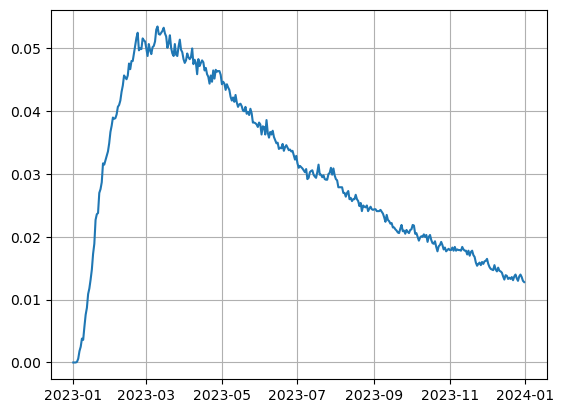

In [52]:
valor_deseado_cemex_log = data_cemex[-1]*1.20
probabilidad_cemex_log = (precios_simulados_cemex_log >= valor_deseado_cemex_log).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_cemex_log)
plt.grid()

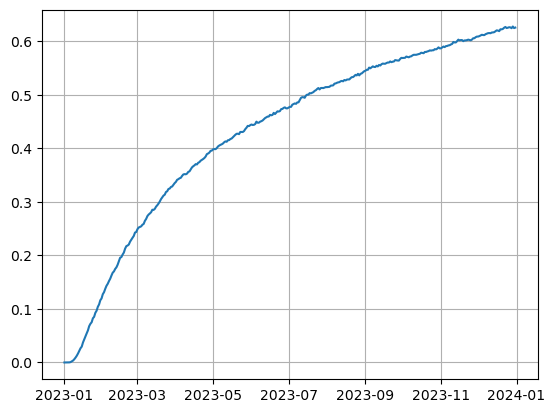

In [53]:
valor_deseado_bimbo_log = data_bimbo[-1]*1.20
probabilidad_bimbo_log = (precios_simulados_bimbo_log >= valor_deseado_bimbo_log).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_bimbo_log)
plt.grid()

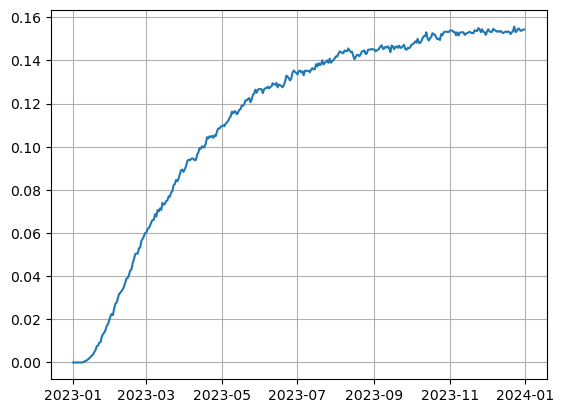

In [54]:
valor_deseado_walmart_log = data_walmart[-1]*1.20
probabilidad_walmart_log = (precios_simulados_walmart_log >= valor_deseado_walmart_log).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_walmart_log)
plt.grid()

#### Comparando las gráficas de probabilidades de tener un retorno de 20% con los diferentes tipos de rendimiento podemos observar que: las probabilidades en las 3 empresas son más altas con el rendimiento simple que con el rendimiento logarítmico, y  que en ambos tipos de rendimiento las tendencias de las gráficas de cada empresa son bastante similares.

#### Conclusiones:

#### Referencias: